In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv('superstore_dataset2011-2015.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
df['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
df['Order Date'].isnull().sum()

0

In [7]:
df1 = df.groupby(["Customer Name"])['Sales'].aggregate(np.sum).reset_index().sort_values('Sales',ascending = False).head(10)
df1

,Customer Name,Sales
758,Tom Ashbrook,40488.07080
731,Tamara Chand,37457.33300
313,Greg Tran,35550.95428
157,Christopher Conant,35187.07640
687,Sean Miller,35170.93296
73,Bart Watters,32310.44650
558,Natalie Fritzler,31781.25850
290,Fred Hopkins,30400.67452
347,Jane Waco,30288.45030
335,Hunter Lopez,30243.56658


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

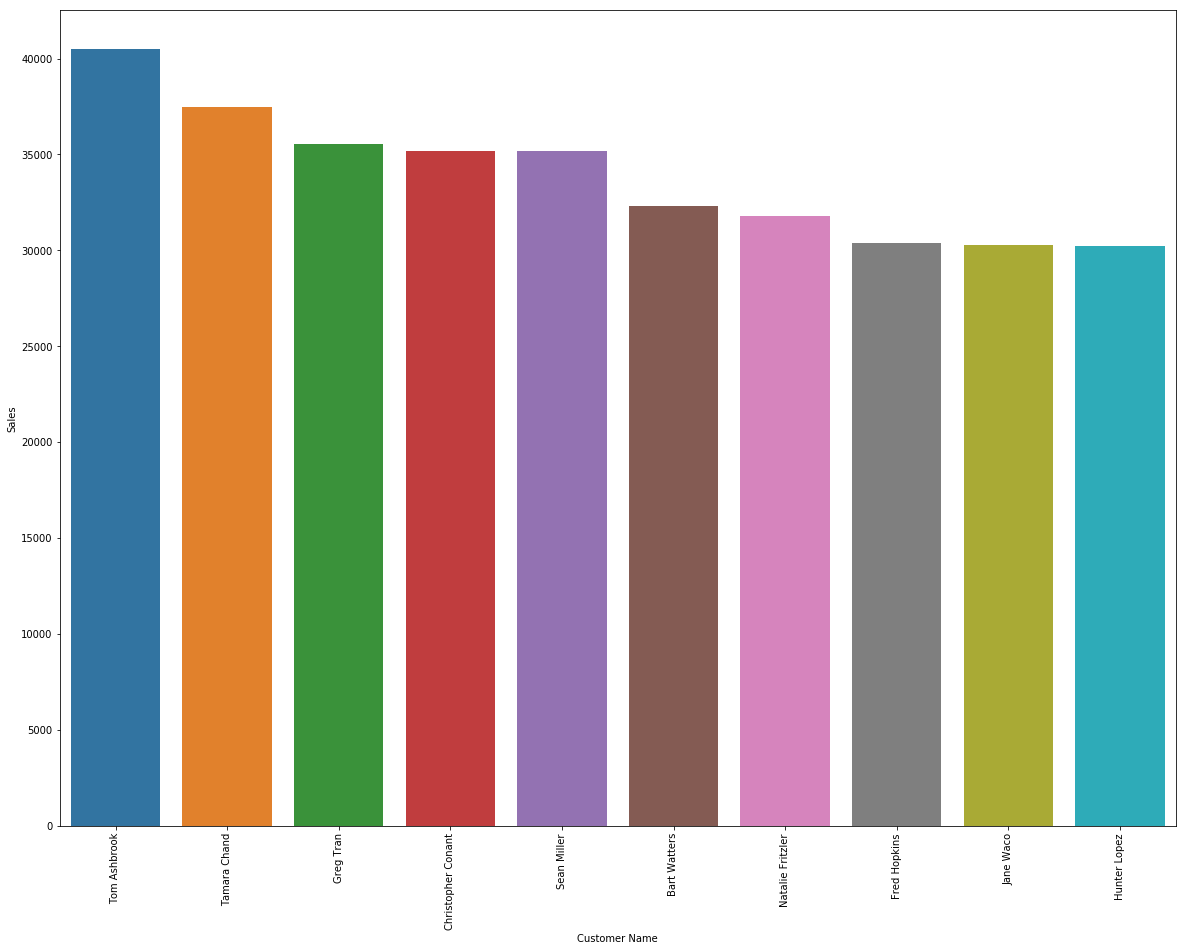

In [8]:
plt.figure(figsize = (20,15))
sns.barplot(x = "Customer Name",y= "Sales",data=df1)
plt.xticks(rotation = 'vertical')

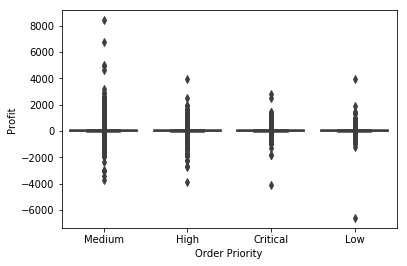

In [9]:
sns.boxplot("Order Priority", "Profit",data= df)

In [10]:
df['Market'].value_counts()
cust_in_eachmarket = pd.DataFrame({'Count' : df.groupby(["Market","Customer Name"]).size()}).reset_index()
cust_in_eachmarket.shape

(4872, 3)

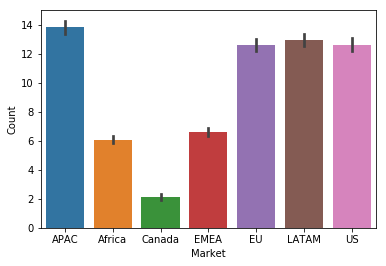

In [11]:
sns.barplot('Market', 'Count', data=cust_in_eachmarket)

In [12]:
df2 = df.groupby(["Product Name"])['Sales'].aggregate(np.sum).reset_index().sort_values('Sales',ascending = False).head(30)
df2

,Product Name,Sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

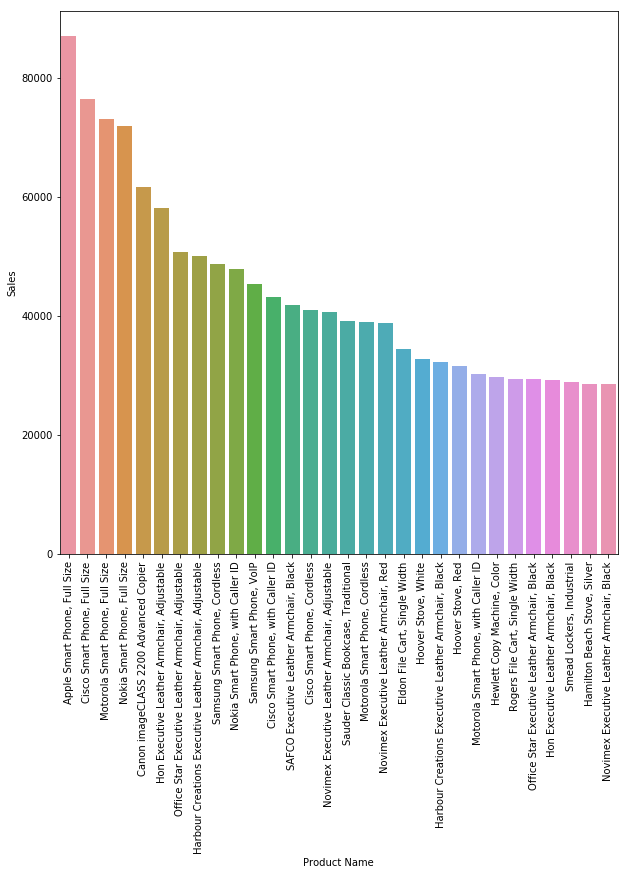

In [13]:
plt.figure(figsize = (10,10))
sns.barplot(x = "Product Name",y= "Sales",data=df2)
plt.xticks(rotation = 'vertical')

In [14]:
df['Product ID'].nunique()

10292

In [15]:
df['Order ID'].nunique()

25035

In [16]:
df['Product Name'].nunique()

3788

In [17]:
df.shape

(51290, 24)

# EDA

In [18]:
del df['Postal Code']

In [19]:
def rep(k):
    return k.replace('-','/')

In [20]:
df['Order Date'] = df['Order Date'].apply(rep)

In [21]:
def change(p):
    q = p.split('/')
    return (q[1] + '/' + q[0] + '/' + q[2])

In [22]:
df['Order Date'] = df['Order Date'].apply(change)

In [24]:
df['Ship Date'] = df['Ship Date'].apply(rep)

In [25]:
df['Ship Date'] = df['Ship Date'].apply(change)

# RFM Analysis 

MONETARY

In [42]:
monetary = df.groupby('Product ID').Sales.sum()
monetary = monetary.sort_index()
monetary

Product ID
FUR-ADV-10000002     159.120
FUR-ADV-10000108     350.070
FUR-ADV-10000183     974.832
FUR-ADV-10000188     124.950
FUR-ADV-10000190     222.360
FUR-ADV-10000571    2194.800
FUR-ADV-10000600     205.800
FUR-ADV-10000847     290.730
FUR-ADV-10001283     177.792
FUR-ADV-10001440     959.139
FUR-ADV-10001659     147.060
FUR-ADV-10001855      89.658
FUR-ADV-10002329       7.476
FUR-ADV-10002601     495.360
FUR-ADV-10002632      36.072
FUR-ADV-10002889     803.772
FUR-ADV-10003147     187.200
FUR-ADV-10003326      54.189
FUR-ADV-10004159     194.670
FUR-ADV-10004223      66.807
FUR-ADV-10004395     614.076
FUR-ADV-10004499     250.050
FUR-ADV-10004718     124.806
FUR-ADV-10004971     392.850
FUR-BAR-10000560    1003.020
FUR-BAR-10000831     319.770
FUR-BAR-10000946    3360.210
FUR-BAR-10001039     212.079
FUR-BAR-10002449    7371.270
FUR-BAR-10002710     364.428
                      ...   
TEC-SHA-10004083    1348.800
TEC-SHA-10004151     510.120
TEC-SHA-10004184     508.260
TEC

FREQUENCY

In [43]:
frequency = df['Product ID'].value_counts()
frequency=frequency.sort_index()

In [136]:
rfm=pd.DataFrame()

In [137]:
rfm['fre']=frequency

In [138]:
rfm['mon']=monetary

In [139]:
rfm

,fre,mon
FUR-ADV-10000002,2,159.120
FUR-ADV-10000108,3,350.070
FUR-ADV-10000183,8,974.832
FUR-ADV-10000188,5,124.950
FUR-ADV-10000190,1,222.360
FUR-ADV-10000571,8,2194.800
FUR-ADV-10000600,2,205.800
FUR-ADV-10000847,5,290.730
FUR-ADV-10001283,2,177.792
FUR-ADV-10001440,7,959.139


RECENCY

In [140]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [141]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [142]:
recency = df.groupby('Product ID')['Order Date'].max()
recency = recency.sort_index()
recency

Product ID
FUR-ADV-10000002   2014-09-08
FUR-ADV-10000108   2012-05-10
FUR-ADV-10000183   2014-12-22
FUR-ADV-10000188   2014-09-19
FUR-ADV-10000190   2011-08-30
FUR-ADV-10000571   2014-12-17
FUR-ADV-10000600   2014-06-16
FUR-ADV-10000847   2014-11-19
FUR-ADV-10001283   2014-09-22
FUR-ADV-10001440   2014-11-26
FUR-ADV-10001659   2014-12-20
FUR-ADV-10001855   2014-07-17
FUR-ADV-10002329   2013-06-14
FUR-ADV-10002601   2014-11-19
FUR-ADV-10002632   2013-06-08
FUR-ADV-10002889   2014-11-04
FUR-ADV-10003147   2013-11-28
FUR-ADV-10003326   2014-11-14
FUR-ADV-10004159   2014-09-30
FUR-ADV-10004223   2014-04-16
FUR-ADV-10004395   2014-12-18
FUR-ADV-10004499   2014-06-09
FUR-ADV-10004718   2014-09-28
FUR-ADV-10004971   2014-06-06
FUR-BAR-10000560   2014-09-19
FUR-BAR-10000831   2012-03-19
FUR-BAR-10000946   2014-09-03
FUR-BAR-10001039   2014-12-27
FUR-BAR-10002449   2014-07-25
FUR-BAR-10002710   2014-03-11
                      ...    
TEC-SHA-10004083   2014-05-28
TEC-SHA-10004151   2014-07-07

In [143]:
latest = df['Order Date'].max()

In [144]:
rfm['rec'] = (latest - recency)

In [145]:
rfm

,fre,mon,rec
FUR-ADV-10000002,2,159.120,114 days
FUR-ADV-10000108,3,350.070,965 days
FUR-ADV-10000183,8,974.832,9 days
FUR-ADV-10000188,5,124.950,103 days
FUR-ADV-10000190,1,222.360,1219 days
FUR-ADV-10000571,8,2194.800,14 days
FUR-ADV-10000600,2,205.800,198 days
FUR-ADV-10000847,5,290.730,42 days
FUR-ADV-10001283,2,177.792,100 days
FUR-ADV-10001440,7,959.139,35 days


In [146]:
def a(k):
    return k.days

In [147]:
rfm['rec'] = rfm['rec'].apply(a)

In [148]:
rfm.head()

,fre,mon,rec
FUR-ADV-10000002,2,159.120,114
FUR-ADV-10000108,3,350.070,965
FUR-ADV-10000183,8,974.832,9
FUR-ADV-10000188,5,124.950,103
FUR-ADV-10000190,1,222.360,1219


In [149]:
rfm.describe()

,fre,mon,rec
count,10292.000000,10292.000000,10292.000000
mean,4.983482,1228.381453,237.596094
std,3.410633,2155.231880,287.210378
min,1.000000,1.624000,0.000000
25%,2.000000,164.326000,43.000000
50%,4.000000,459.048000,119.000000
75%,7.000000,1358.446500,334.250000
max,35.000000,61599.824000,1458.000000


# Outlier Treatment

In [150]:
IQR_mon = np.percentile(rfm['mon'],75) - np.percentile(rfm['mon'],25)
IQR_mon

1194.1205

In [151]:
IQR_fre = np.percentile(rfm['fre'],75) - np.percentile(rfm['fre'],25)
IQR_fre

5.0

In [152]:
IQR_rec = np.percentile(rfm['rec'],75) - np.percentile(rfm['rec'],25)
IQR_rec

291.25

In [153]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
rfm1 = pd.DataFrame(standard_scaler.fit_transform(rfm))
rfm1

C:\Users\shushma varma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shushma varma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2
0,-0.874802,-0.496148,-0.430354
1,-0.581587,-0.407545,2.532775
2,0.884488,-0.117649,-0.795957
3,0.004843,-0.512003,-0.468655
4,-1.168017,-0.466804,3.417187
5,0.884488,0.448428,-0.778548
6,-0.874802,-0.474488,-0.137871
7,0.004843,-0.435079,-0.681053
8,-0.874802,-0.487484,-0.479101
9,0.591273,-0.124931,-0.705427


silhouette score 0.37945372765276447 number of clusters are: 2
silhouette score 0.4147308288815123 number of clusters are: 3
silhouette score 0.3943527092271923 number of clusters are: 4
silhouette score 0.32640481445523123 number of clusters are: 5
silhouette score 0.3654561142397889 number of clusters are: 6
silhouette score 0.35767898826343464 number of clusters are: 7
silhouette score 0.36078035421405774 number of clusters are: 8
silhouette score 0.33415844219576785 number of clusters are: 9
silhouette score 0.32800372249197146 number of clusters are: 10
silhouette score 0.3322809258138925 number of clusters are: 11
silhouette score 0.33545165340088684 number of clusters are: 12
silhouette score 0.341754364564205 number of clusters are: 13
silhouette score 0.3295460693738961 number of clusters are: 14
silhouette score 0.33426145640832583 number of clusters are: 15
silhouette score 0.3368106051347941 number of clusters are: 16
silhouette score 0.34586265394481025 number of clusters 

([<matplotlib.axis.XTick at 0x19085d6e320>,
 <a list of 19 Text xticklabel objects>)

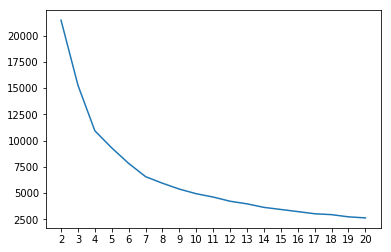

In [154]:
k=range(2,21)
ssd = []
for num_clusters in list(range(2,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(rfm1)
    sil_score=silhouette_score(rfm1,model_clus.labels_)
    print("silhouette score",sil_score,"number of clusters are:",num_clusters)
    ssd.append(model_clus.inertia_)

plt.plot(k,ssd)
plt.xticks(k)

In [160]:
k = KMeans(n_clusters = 3, max_iter = 100)
k.fit(rfm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [161]:
rfm1.head()

,0,1,2
0,-0.874802,-0.496148,-0.430354
1,-0.581587,-0.407545,2.532775
2,0.884488,-0.117649,-0.795957
3,0.004843,-0.512003,-0.468655
4,-1.168017,-0.466804,3.417187


In [162]:
rfm['ClusterID'] = k.labels_

In [163]:
rfm.head()

,fre,mon,rec,ClusterID
FUR-ADV-10000002,2,159.120,114,0
FUR-ADV-10000108,3,350.070,965,1
FUR-ADV-10000183,8,974.832,9,0
FUR-ADV-10000188,5,124.950,103,0
FUR-ADV-10000190,1,222.360,1219,1


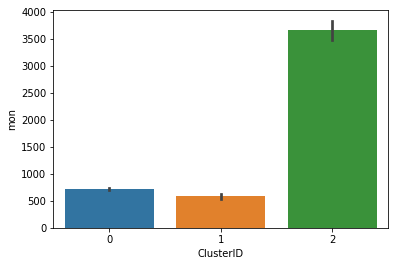

In [164]:
sns.barplot(x=rfm.ClusterID, y=rfm.mon)

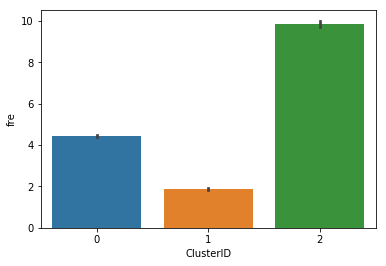

In [165]:
sns.barplot(x=rfm.ClusterID, y=rfm.fre)

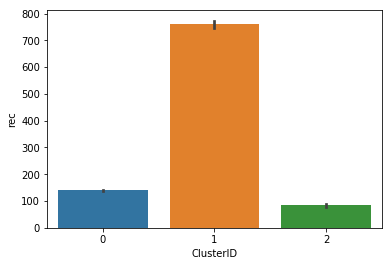

In [166]:
sns.barplot(x=rfm.ClusterID, y=rfm.rec)

In [167]:
rfm['ClusterID'].value_counts()

0    6629
2    1871
1    1792
Name: ClusterID, dtype: int64

In [168]:
export_to_excel = rfm.to_excel('export_superstore.xlsx')